In [1]:
import os
os.environ['KMP_DUPLICATE_LIB_OK'] = 'True'
import torch
from torchvision import transforms
from PIL import Image
from model import EncoderCNN, DecoderRNN
from utils import clean_sentence
from data_loader import get_loader
import matplotlib.pyplot as plt
%matplotlib inline

# Define a transform to pre-process the testing images
transform_test = transforms.Compose([
    transforms.Resize(256),                          # smaller edge of image resized to 256
    transforms.CenterCrop(224),                      # get 224x224 crop from the center
    transforms.ToTensor(),                           # convert the PIL Image to a tensor
    transforms.Normalize((0.485, 0.456, 0.406),      # normalize image for pre-trained model
                         (0.229, 0.224, 0.225))
])

# Create the data loader
data_loader = get_loader(transform=transform_test,
                         mode='test')

def get_caption(image_path):
    # Define the transformation to preprocess the image
    transform = transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225))
    ])

    # Load the image and apply the transformation
    image = Image.open(image_path).convert("RGB")
    image = transform(image)

    # Add a batch dimension
    image = image.unsqueeze(0)

    # Check if GPU is available
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

    # Load the most recent checkpoint
    checkpoint = torch.load(os.path.join('./models', 'best-model.pkl'))

    # Specify values for embed_size and hidden_size
    embed_size = 256
    hidden_size = 512

    # Get the vocabulary and its size
    vocab = data_loader.dataset.vocab
    vocab_size = len(vocab)

    # Initialize the encoder and decoder, and set each to inference mode
    encoder = EncoderCNN(embed_size).to(device)
    encoder.eval()
    decoder = DecoderRNN(embed_size, hidden_size, vocab_size).to(device)
    decoder.eval()

    # Load the pre-trained weights
    encoder.load_state_dict(checkpoint['encoder'])
    decoder.load_state_dict(checkpoint['decoder'])

    # Move the models to the same device as the image
    encoder.to(device)
    decoder.to(device)

    # Obtain the embedded image features
    features = encoder(image)

    # Reshape the features tensor to have the expected shape
    features = features.unsqueeze(1)

    # Pass the embedded image features through the model to get a predicted caption
    output = decoder.sample(features)
    
    # Clean up the predicted caption
    sentence = clean_sentence(output, vocab)

    # Return the caption
    return sentence



Vocabulary successfully loaded from vocab.pkl file!


In [2]:
def get_caption1(image_path):
    # Define the transformation to preprocess the image
    transform = transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225))
    ])

    # Load the image and apply the transformation
    image = Image.open(image_path).convert("RGB")
    image = transform(image)

    # Add a batch dimension
    image = image.unsqueeze(0)

    # Check if GPU is available
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

    # Load the most recent checkpoint
    checkpoint = torch.load(os.path.join('./models', 'best-model.pkl'))

    # Specify values for embed_size and hidden_size
    embed_size = 256
    hidden_size = 512

    # Get the vocabulary and its size
    vocab = data_loader.dataset.vocab
    vocab_size = len(vocab)

    # Initialize the encoder and decoder, and set each to inference mode
    encoder = EncoderCNN(embed_size).to(device)
    encoder.eval()
    decoder = DecoderRNN(embed_size, hidden_size, vocab_size).to(device)
    decoder.eval()

    # Load the pre-trained weights
    encoder.load_state_dict(checkpoint['encoder'])
    decoder.load_state_dict(checkpoint['decoder'])

    # Move the models to the same device as the image
    encoder.to(device)
    decoder.to(device)

    # Obtain the embedded image features
    features = encoder(image)

    # Reshape the features tensor to have the expected shape
    features = features.unsqueeze(1)

    # Pass the embedded image features through the model to get a predicted caption
    output = decoder.sample_beam_search(features, max_len=20, beam_width=5)
    
    # Clean up the predicted caption
    sentence = clean_sentence(output[0], vocab)  # Assuming the first caption in the list is the best prediction

    # Return the caption
    return sentence


Caption using greedy search: a horse grazing in a field with a mountain in the background
Caption using beam search: a brown and white cow in a grassy field .


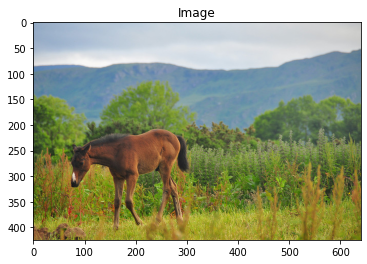

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline

# Load and display the image
image_path = "C:\\image_captioning\\cocoapi\\images\\test2014\\COCO_test2014_000000000750.jpg"
image = Image.open(image_path)
# Get the caption for the image using sample
caption = get_caption(image_path)

print("Caption using greedy search:", caption)

caption1 = get_caption1(image_path)

print("Caption using beam search:", caption1)


plt.imshow(image)
plt.title('Image')
plt.show()


In [4]:
image_path = "C:\\image_captioning\\cocoapi\\images\\test2014\\COCO_test2014_000000000027.jpg"

In [5]:
image_path = "C:\\Users\\91887\\OneDrive - bmsce.ac.in\\Pictures\\hum paanch\\IMG-20200916-WA0000.jpg"

In [6]:
image_path = "C:\\Users\\91887\\OneDrive - bmsce.ac.in\\Pictures\\Camera Roll\\IMG-20200711-WA0005.jpg"

In [7]:
image_path = "C:\\image_captioning\\cocoapi\\images\\test2014\\COCO_test2014_000000001110.jpg"

In [8]:
image_path = "C:\\image_captioning\\cocoapi\\images\\test2014\\COCO_test2014_000000001671.jpg"

In [9]:
image_path = "C:\\Users\\91887\\OneDrive - bmsce.ac.in\\Pictures\\Camera Roll\\IMG-20210330-WA0003.jpg"

In [10]:
image_path = "C:\\image_captioning\\cocoapi\\images\\test2014\\COCO_test2014_000000000750.jpg"

In [11]:
image_path = "C:\\image_captioning\\cocoapi\\images\\test2014\\COCO_test2014_000000001371.jpg"

In [12]:
image_path = "C:\\image_captioning\\cocoapi\\images\\test2014\\COCO_test2014_000000002082.jpg"